In [1]:
import scipy.io
from scipy import interpolate
import numpy as np

def d3_scale(dat, out_range=(-1, 1), in_range=None):
    if in_range == None:
        domain = [np.min(dat, axis=0), np.max(dat, axis=0)]
    else:
        domain = in_range

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

# load the patterns from matlab
pattern_file_names = [
     "nnRawExaStride",
     "nnRawSlowWalk",
     "nnRawWalk",
     "nnRawRunJog",
     "nnRawCartWheel",
     "nnRawWaltz",
     "nnRawCrawl",
     "nnRawStandup",
     "nnRawGetdown",
     "nnRawSitting",
     "nnRawGetSeated",
     "nnRawStandupFromStool",
     "nnRawBox1",
     "nnRawBox2",
     "nnRawBox3",
]

output_dims = 61
pattern_num = 2
pattern_file_names = pattern_file_names[:2]

In [2]:
min_maxs = np.zeros((output_dims, 2))
min_maxs[0,:].shape

(2,)

In [3]:
min_maxs = np.zeros((output_dims, 2))
min_maxs[:, 0] = np.inf
min_maxs[:, 1] = -np.inf
raw_dats = []

# get the actual maximum and minimums for each dimension
for nm in pattern_file_names:
    name = nm[5:]
    raw_dats.append(scipy.io.loadmat("section2.3_demoMotionCapture/nnData/%s.mat" %(nm))["nnRawData"+name].T)
    for o_i in range(output_dims):
        assert raw_dats[-1][o_i].shape != (61,)
        
        min_val = np.min(raw_dats[-1][o_i])
        if min_val < min_maxs[o_i, 0]:
            min_maxs[o_i, 0] = min_val

        max_val = np.max(raw_dats[-1][o_i])
        if max_val > min_maxs[o_i, 1]:
            min_maxs[o_i, 1] = max_val

In [4]:
print(min_maxs[:, 0])

[  7.89227851e+02  -1.44658396e-02   7.34937711e+00  -2.59273920e+00
  -5.04577846e-15  -9.99999999e-01  -6.19650421e-02  -4.23118332e-01
  -2.74384536e-01  -9.96237001e-01  -9.34289496e-01  -7.10716052e-02
  -9.91417327e-01  -9.11771779e-02  -2.39937871e-01  -9.99355699e-01
  -4.82374826e-15   9.98078320e-01  -4.42994365e-02  -4.95882266e-01
   6.38311504e-02  -9.97910817e-01  -9.51882837e-01  -2.64347296e-01
  -9.93612443e-01  -1.26776022e-01  -1.93317918e-01  -9.99085200e-01
   6.28631540e-02  -9.34731901e-02   9.04264839e-01  -8.79724294e-02
  -2.45196842e-01   9.51765501e-01   4.53438646e-02  -2.20280730e-01
   9.55976077e-01  -6.73788882e-01  -9.99765733e-01  -3.36178297e-01
  -8.99113407e-01  -4.85978045e-01  -9.91574606e-01  -8.40509377e-01
  -2.79669028e-01  -9.98655047e-01  -9.47720447e-01  -5.15932584e-01
  -9.88560532e-01  -7.27964954e-01   6.81344079e-01  -1.19617880e-01
  -8.99865027e-01  -2.56700183e-01  -9.81006346e-01  -9.07641296e-01
  -4.99938520e-01  -9.99139420e-01

In [5]:
assert np.all(min_maxs[:, 0] != np.inf)
assert np.all(min_maxs[:, 1] != -np.inf)

In [6]:
function_list = []

for n_i, nm in enumerate(pattern_file_names):
    # make each pattern values normalised between -1, 1
    # and temporally squash them between -1 and 1 too
    function_list.append([])
    raw_dat = raw_dats[n_i]
    xv = np.linspace(-1, 1, raw_dat.shape[1])
    assert raw_dat.shape[0] == output_dims
    normed_data = np.zeros_like(raw_dat)

    for o_i in range(output_dims):
        assert min_maxs[o_i][0] <= np.min(raw_dat[o_i, :]) 
        assert min_maxs[o_i][1] >= np.max(raw_dat[o_i, :]) 
        normed_data[o_i, :] = d3_scale(raw_dat[o_i, :], in_range=min_maxs[o_i])
        assert np.max(normed_data) <= 1.0
        assert np.min(normed_data) >= -1.0
        function_list[-1].append(interpolate.interp1d(xv, normed_data[o_i, :]))

c:\Users\Sean Aubin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
print(raw_dats[0][0].shape)
print(min_maxs[0])

(291,)
[ 789.22785097  985.73773527]


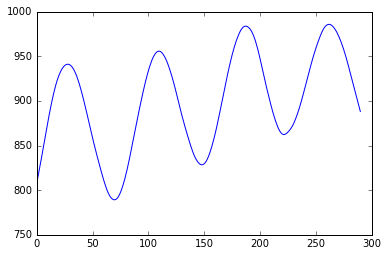

In [10]:
plt.plot(raw_dats[0][0])
#plt.plot(raw_dats[1][0])
plt.savefig("good")

ValueError: x and y must be the same size

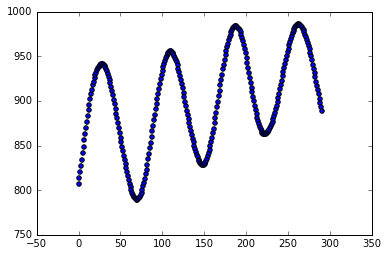

In [85]:
# can approx? yes!
raw_dat = raw_dats[0][0]
x_max = raw_dat.shape[0]
xv = np.linspace(0, x_max, x_max)
plt.scatter(xv, raw_dat)

x_new = np.linspace(-np.pi, np.pi, x_max)
f_approx = interpolate.interp1d(x_new, d3_scale(raw_dat))
plt.plot(d3_scale(f_approx(x_new), in_range=(-1, 1), out_range=min_maxs[0]))

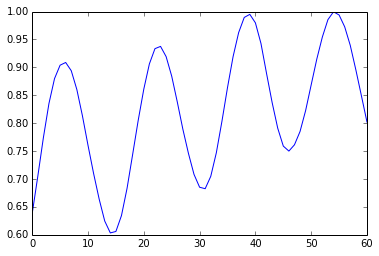

In [44]:
xv = np.linspace(-1, 1, raw_dat.shape[0])

plt.plot(function_list[0][0](xv))

In [4]:
af = scipy.io.loadmat("section2.3_demoMotionCapture/nnData/%s.mat" %(pattern_file_names[0]))

In [20]:
tmp = af['nnRawDataExaStride'].T
tmp[0].shape

(291,)

In [5]:
reg_out = scipy.io.loadmat("pattern_out.mat")['reg_out']

In [18]:
print(reg_out[0, :].shape)
print(np.min(raw_dat))
print(np.max(raw_dat))

(61,)


NameError: name 'raw_dat' is not defined

(800, 1000)

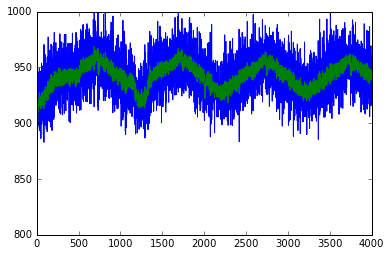

In [87]:
from nengo.synapses import filt

plt_val = d3_scale(reg_out[:, 0], in_range=(-1, 1), out_range=min_maxs[0])
plt.plot(plt_val)
plt.plot(filt(plt_val, 0.003, dt=0.001))
plt.ylim(800, 1000)